Contact tracing is a process used by public health ministries to help stop the spread of infectious disease such as COVID-19.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.cluster import DBSCAN
df = pd.read_json('C:/Users/USER/Downloads/livedata.json')
df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


In [ ]:
#positions of every person every time stamp

In [4]:
df.shape[0]

100

In [5]:
df.shape

(100, 4)

In [49]:
#df.columns there are 4 cols like id,timestamp,latitude,longitude


Index(['id', 'timestamp', 'latitude', 'longitude'], dtype='object')

In [50]:
BBox = (df.longitude.min(),df.longitude.max(),df.latitude.min(), df.latitude.max())
BBox
#i find the minimum longitude value,max longitude value,min,max value

(77.5533811, 77.7054541, 13.0102837, 13.2496455)

In [6]:
# banglore_m = plt.imread('../input/bangalore-map/map.png')
# fig, ax = plt.subplots(figsize = (10,10))
# ax.scatter(df.longitude, df.latitude)
# ax.set_title('Plotting Spatial Data on Map')
# ax.set_xlim(BBox[0],BBox[1])
# ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(banglore_m, extent = BBox, aspect= 'equal')
# plt.show()#take pic from kag

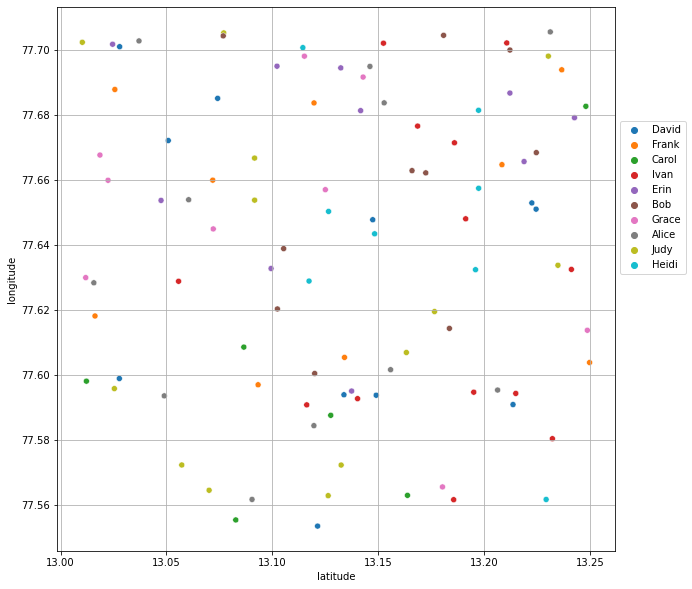

In [51]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="latitude",y="longitude",data=df,hue="id")
plt.legend(bbox_to_anchor= [1, 0.8])
plt.grid()

In [7]:
a=df[df.id=='Ivan']
a.head()

,id,timestamp,latitude,longitude
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273
16,Ivan,2020-07-04 20:35:30,13.241058,77.632370
18,Ivan,2020-07-04 12:35:30,13.194985,77.594589
20,Ivan,2020-07-04 21:35:30,13.055701,77.628720
22,Ivan,2020-07-04 13:35:30,13.168495,77.676476


In [6]:
# def generateBaseMap(default_location, default_zoom_start=12):
#     base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
#     return base_map
# understand the meaning of th code

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         100 non-null    object        
 1   timestamp  100 non-null    datetime64[ns]
 2   latitude   100 non-null    float64       
 3   longitude  100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.2+ KB


In [8]:
df.duplicated().value_counts()

False    100
dtype: int64

In [53]:
df=df.drop_duplicates()

In [54]:
df.isnull().sum()

id           0
timestamp    0
latitude     0
longitude    0
dtype: int64

In [22]:
df.dtypes

id                   object
timestamp    datetime64[ns]
latitude            float64
longitude           float64
cluster               int64
hour                  int64
dtype: object

In [58]:
df.timestamp.head()[0]

Timestamp('2020-07-04 15:35:30')

In [15]:
# Converting column to datetime
df['timestamp']=pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M:%S')#already the date column is in date format only
# Creating hour column
df['hour']=df['timestamp'].apply(lambda x: x.hour+1)
df.head(10)

,id,timestamp,latitude,longitude,cluster,hour
0,David,2020-07-04 15:35:30,13.148953,77.593651,-1,16
1,David,2020-07-04 16:35:30,13.222397,77.652828,-1,17
2,Frank,2020-07-04 14:35:30,13.236507,77.693792,-1,15
3,Carol,2020-07-04 21:35:30,13.163716,77.562842,-1,22
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273,-1,23
5,Erin,2020-07-04 14:35:30,13.132235,77.694382,-1,15
6,Bob,2020-07-04 13:35:30,13.224501,77.668313,-1,14
7,Grace,2020-07-04 14:35:30,13.142778,77.691560,-1,15
8,Alice,2020-07-04 22:35:30,13.090368,77.561579,-1,23
9,Frank,2020-07-04 12:35:30,13.208293,77.664607,-1,13


In [19]:
df.cluster.unique()

array([-1,  0], dtype=int64)

In [63]:
# df2=pd.DataFrame(df.groupby(['hour','id'])['timestamp'].max())
# #df2.reset_index(inplace=True) why da?
# df2.head() # data manim codes ok d not exe

In [62]:
# df3=pd.merge(df2,df,left_on=['hour','id','timestamp'],right_on=['hour','id','timestamp'])
# df3.head() # data manim codes ok  d not exe

In [14]:
# lat_long_list = []
# for i in range(1,25):
#     temp=[]
#     for index, instance in df3[df3['hour'] == i].iterrows():
#         temp.append([instance['latitude'],instance['longitude']])
#     lat_long_list.append(temp)

In [9]:
from branca.element import Element, Figure, Html, MacroElement


In [10]:

fig=Figure(width=550,height=350)

In [16]:
!pip install folium


In [25]:
import folium
from folium.plugins import HeatMapWithTime
fig7=Figure(width=850,height=550)
m7=folium.Map(location=[13.12, 77.8],zoom_start=10)
HeatMapWithTime(lat_long_list,radius=15,auto_play=True,position='bottomright').add_to(m7)
m7

In [ ]:
#the function identifies the individuals in the same clusters as the input name (excluding the input name itself) 
#and adds their names to a list called "infected_names". 

In [25]:
def get_infected_names(input_name):

    epsilon = 5.721 # a radial distance of 6 feet in kilometers
    model = DBSCAN(eps=epsilon, min_samples=3, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()
    print("hi")
    input_name_clusters = []
    for i in range(len(df)):
#         print("hi1")
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])
    
    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
#                 print("hi1")
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    
    return infected_names
# epsilon = 0.0018288 # a radi

In [26]:
print(get_infected_names('David'))

hi
['Frank', 'Carol', 'Ivan', 'Erin', 'Bob', 'Grace', 'Alice', 'Judy', 'Heidi']


In [22]:
df.id
#I changed epsilion value from some value to 5.721
#i changed min samples value to 3,100

0     David
1     David
2     Frank
3     Carol
4      Ivan
      ...  
95     Judy
96      Bob
97    Grace
98      Bob
99    Alice
Name: id, Length: 100, dtype: object

In [20]:
a=4
b=5
#
#iterate from 1 to 10.
l1=[]
for i in range(1,11):
    if i%2==0:
        pass
    else:
        l1.append(i**2)
print(l1)
#pass works as an if loop stmt.ctrl moves to next iteration .either if or else gets executed.

[1, 9, 25, 49, 81]


In [23]:
def get_infected_names(input_name):
    epsilon = 0.0018288
     # a radial distance of 6 feet in kilometers
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()
    print("hi")
    input_name_clusters = []
    print(df)
    return None
    

In [24]:
get_infected_names('David')

hi
       id           timestamp   latitude  longitude  cluster  hour
0   David 2020-07-04 15:35:30  13.148953  77.593651       -1    16
1   David 2020-07-04 16:35:30  13.222397  77.652828       -1    17
2   Frank 2020-07-04 14:35:30  13.236507  77.693792       -1    15
3   Carol 2020-07-04 21:35:30  13.163716  77.562842       -1    22
4    Ivan 2020-07-04 22:35:30  13.232095  77.580273       -1    23
..    ...                 ...        ...        ...      ...   ...
95   Judy 2020-07-04 16:35:30  13.176481  77.619396       -1    17
96    Bob 2020-07-04 15:35:30  13.172339  77.662080       -1    16
97  Grace 2020-07-04 23:35:30  13.115079  77.697991       -1    24
98    Bob 2020-07-04 19:35:30  13.180751  77.704404       -1    20
99  Alice 2020-07-04 19:35:30  13.206235  77.595245       -1    20

[100 rows x 6 columns]


In [ ]:
#we can cluster the dp of lat and long columns using DBSCAn algorithm.no need to calculate the distance.
#your assumption that DBSCAN uses a distance matrix is wrong:

In [ ]:
#Clustering analysis or simply Clustering is basically an Unsupervised learning method
that divides the data points into a number of specific batches or groups, such that the data points 
in the same groups have similar properties and data points in different groups have different properties 

In [ ]:
#DBSCAN (distance between nearest points)